In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('dados_filtrados_v4_cotistas.csv')
df1 = pd.read_csv('dados_filtrados_v4.csv')

In [15]:
df1 = df1[df1['Cotista'] == 0]

In [7]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [8]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


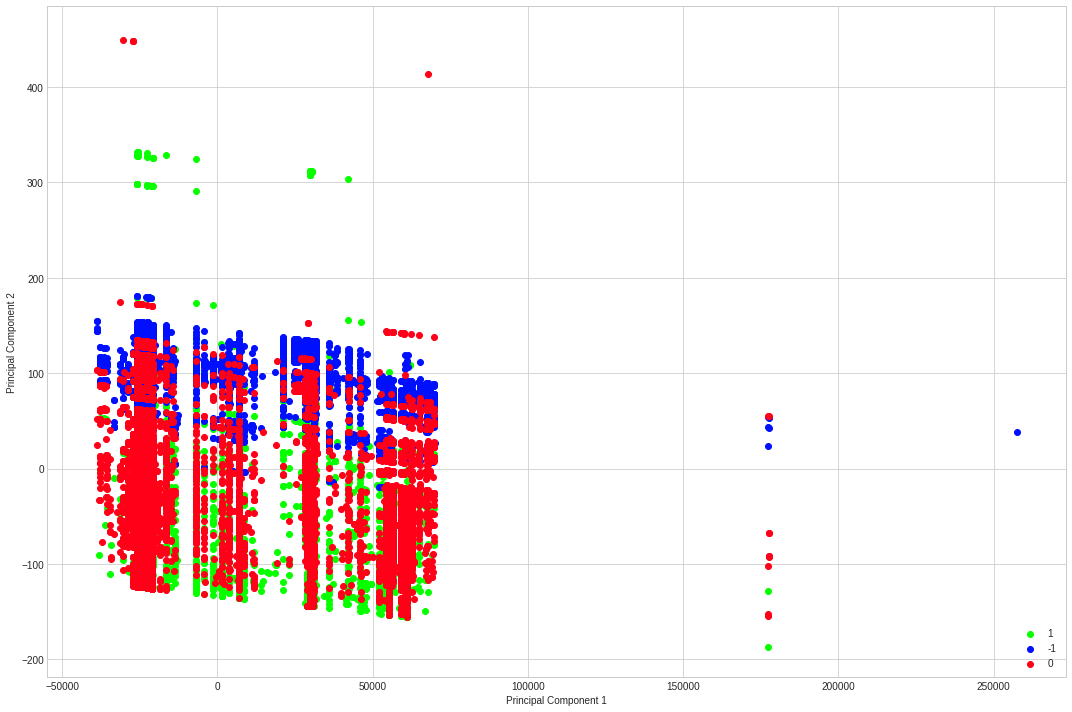

In [9]:
data = (
    df.loc[:, ['Sexo', 'Tipo de Escola', 'Raça', 'Curso', 'Créditos cursados no total', 'Créditos cursados no semestre(com aprovação)',
              'Média do período', 'Menção na disciplina', 'Código da disciplina','semestre', 'idade', 'saiu']]
        .dropna()
)
currentLabel = 'saiu'
x = data.iloc[:].values
y = data[currentLabel].values

data[currentLabel]
numColors = len(data[currentLabel].unique())

sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(x)

cmap = get_cmap(numColors+1)
colorList = [cmap(i) for i in range(1, numColors+1)]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


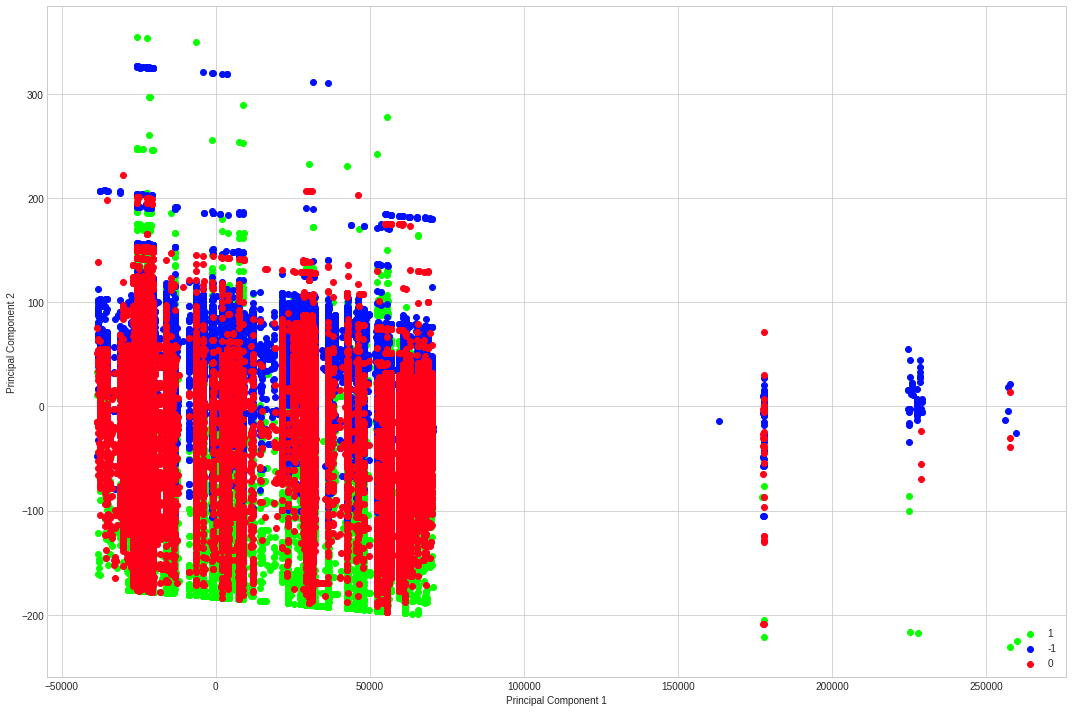

In [17]:
data = (
    df1.loc[:, ['Sexo', 'Tipo de Escola', 'Raça', 'Curso', 'Créditos cursados no total', 'Créditos cursados no semestre(com aprovação)',
              'Média do período', 'Menção na disciplina', 'Código da disciplina','semestre', 'idade', 'saiu']]
        .dropna()
)
currentLabel = 'saiu'
x = data.iloc[:].values
y = data[currentLabel].values

data[currentLabel]
numColors = len(data[currentLabel].unique())

sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(x)

cmap = get_cmap(numColors+1)
colorList = [cmap(i) for i in range(1, numColors+1)]


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plt.show()

In [10]:
Y_sklearn[1]

array([-22643.8979988 ,   -124.96115398])

In [11]:
def formatColor(color):
    return 'rgb('+str(int(color[0]*255))+','+str(int(color[1]*255))+','+str(int(color[2]*255))+')'

def drawFrame(a, X_embedded, currentLabel = 'Raça'):
    
    data = a
    Y_sklearn = X_embedded
    y = data[currentLabel].values
    numColors = len(data[currentLabel].unique())

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    traceArr = []
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        
        trace1 = go.Scatter(
            x=Y_sklearn[y==lab, 0],
            y=Y_sklearn[y==lab, 1],
            mode='markers',
            marker=dict(
                size=3,
                color=formatColor(col),
                opacity=0.8
            )
        )
        traceArr.append(trace1)

    data = traceArr
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [12]:
drawFrame(data, Y_sklearn, 'saiu')